## 1.Intro

## Heart Disease Prediction


Trying to predict if a person has heart disease (1) or not (0).  
Dataset has info like age, cholesterol, blood pressure, etc.  

Models I’m using:  
- Logistic Regression (simple, easy to explain)  
- Random Forest (more powerful, handles non-linear stuff)  

Will check accuracy, ROC, and feature importance.



## 2. Importing Libraries

In [14]:
# basic stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)


## 3.Loading Dataset
We load the heart disease dataset from CSV and take a quick look at the first few rows.


In [15]:
# loading csv
df = pd.read_csv("Heart_Disease_Prediction.csv")

# just checking first few rows
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## 4. Exploring the Data
Check data types, missing values, and distribution of the target variable.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

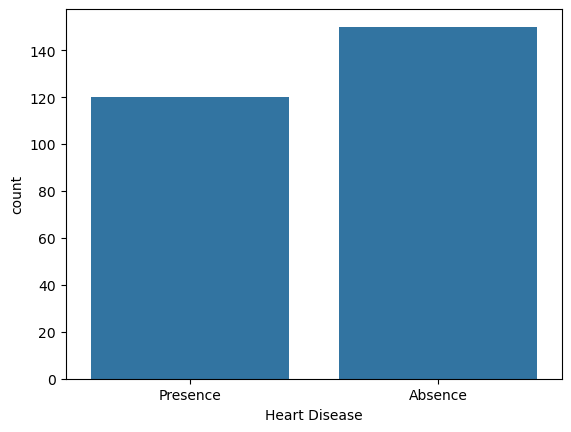

In [16]:
# info about cols + datatypes
df.info()

# basic stats
df.describe()

# how many 0 vs 1 in target
sns.countplot(x='Heart Disease', data=df)
plt.show()




### 5. Spliting Dataset into Training and Test Sets

We split the scaled features and target into training and test sets using `train_test_split` from `sklearn.model_selection`.


In [17]:
# X = features, y = target
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# scaling features (helps LR more than RF)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## 6.Logistic Regression

In [18]:
# logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)  # train it

# predictions
y_pred_lr = lr_model.predict(X_test)

# checking accuracy + report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.9074074074074074
[[31  2]
 [ 3 18]]
              precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



## 7. Random Forest

In [19]:
# random forest (100 trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predictions
y_pred_rf = rf_model.predict(X_test)

# check accuracy + report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))




Random Forest Accuracy: 0.7962962962962963
[[29  4]
 [ 7 14]]
              precision    recall  f1-score   support

     Absence       0.81      0.88      0.84        33
    Presence       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



## 8.ROC Curve (Receiver Operating Characteristic)

The ROC Curve shows the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR) at different thresholds.
AUC (Area Under the Curve) quantifies the overall classifier performance.


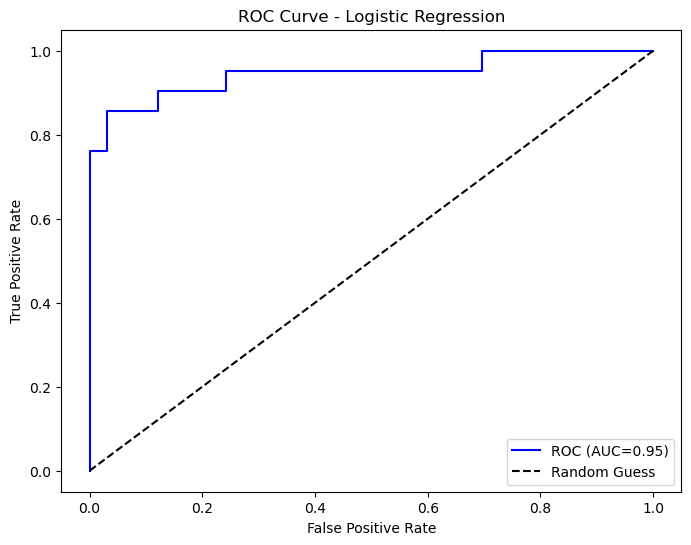

In [20]:
# need encoded target for ROC
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# probs from logistic regression
y_prob = lr_model.predict_proba(X_test)[:, 1]

# roc curve points
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
auc_score = roc_auc_score(y_test_encoded, y_prob)

# plotting roc
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC (AUC={auc_score:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()



## 9.Feature importance (Random Forest)

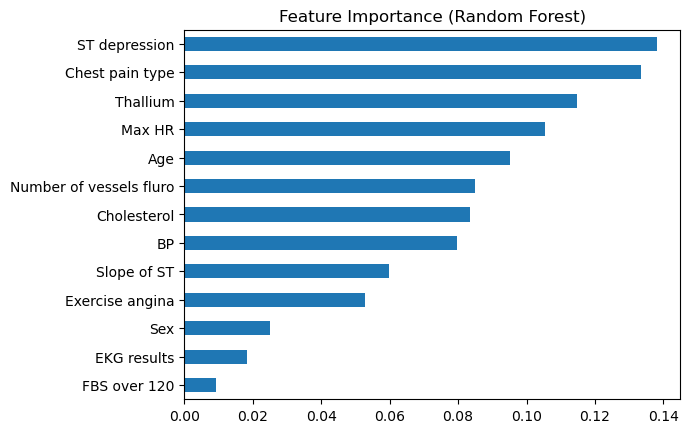

In [21]:
# feature importance from rf
feat_importances = pd.Series(rf_model.feature_importances_, index=df.columns[:-1])

# sort + plot
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()


## Conclusion

- Logistic Regression - It is a  decent accuracy, simple model  
- Random Forest - It did a bit better in accuracy  
- ROC curve showed LR had good AUC as well  
- RF feature importance gave hints on which health factors matter more  

Overall, Random Forest performed the best, while Logistic Regression was easier to interpret.
